In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
#from config import aqi_key



In [2]:
aqi_key="a1990409-b784-4372-9313-1a548d23f2c7"

In [3]:
airports_df = pd.read_csv('Resource Files/airports.csv')
airports_df

,IATA,AIRPORT,City,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ADK,Adak,Adak,AK,USA,51.877964,-176.646031
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,BRW,Wiley Post Will Rogers Memorial,Barrow,AK,USA,71.285448,-156.766002
3,BET,Bethel,Bethel,AK,USA,60.779776,-161.837998
4,CDV,Merle K (Mudhole) Smith,Cordova,AK,USA,60.491834,-145.477650
...,...,...,...,...,...,...,...
336,RKS,Rock Springs-Sweetwater County,Rock Springs,WY,USA,41.594217,-109.065193
337,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
338,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
339,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302


In [4]:
#change the state code to state name in order to match values in api request
airports_df["STATE"].replace({ 'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}, inplace=True)


In [5]:
airports_df
#len(airports_df)=341

,IATA,AIRPORT,City,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ADK,Adak,Adak,Alaska,USA,51.877964,-176.646031
1,ANC,Ted Stevens Anchorage International,Anchorage,Alaska,USA,61.174320,-149.996186
2,BRW,Wiley Post Will Rogers Memorial,Barrow,Alaska,USA,71.285448,-156.766002
3,BET,Bethel,Bethel,Alaska,USA,60.779776,-161.837998
4,CDV,Merle K (Mudhole) Smith,Cordova,Alaska,USA,60.491834,-145.477650
...,...,...,...,...,...,...,...
336,RKS,Rock Springs-Sweetwater County,Rock Springs,Wyoming,USA,41.594217,-109.065193
337,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
338,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
339,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302


In [27]:
#this api call is getting a list of cities containing AQI stations that will be able to provide data
#the api keeps throwing errors when run for all 50 states at once, so I'm running each call for 10 states at a time
#add each 10 state response to a separate dict.
state_unique=airports_df['STATE'].unique()
state_dict5={}
for STATE_NAME in state_unique[40:50]:
    try:
        state_url=f"http://api.airvisual.com/v2/cities?state={STATE_NAME}&country=USA&key={aqi_key}"
        state_response=requests.get(state_url).json()

        cities=[response_dict['city'] for response_dict in state_response['data']]
        state_dict5[STATE_NAME]=cities
    except TypeError:
         state_dict5[STATE_NAME]=" "
    print(state_response['data'])

{'message': 'state_not_found'}
[{'city': 'East Providence'}, {'city': 'Narragansett'}, {'city': 'North Kingstown'}, {'city': 'Providence'}, {'city': 'Rumford'}, {'city': 'West Greenwich'}]
[{'city': 'Aiken'}, {'city': 'Awendaw'}, {'city': 'Blacksburg'}, {'city': 'Bonneau Beach'}, {'city': 'Catawba'}, {'city': 'Cayce'}, {'city': 'Charleston'}, {'city': 'Columbia'}, {'city': 'Florence'}, {'city': 'Graniteville'}, {'city': 'Greenville'}, {'city': 'Lancaster'}, {'city': 'Leesville'}, {'city': 'North Augusta'}, {'city': 'North Charleston'}, {'city': 'Northlake'}, {'city': 'Pendleton'}, {'city': 'Seneca'}, {'city': 'Spartanburg'}, {'city': 'Surfside Beach'}, {'city': 'Trenton'}]
[{'city': 'Aberdeen'}, {'city': 'Brookings'}, {'city': 'Colonial Pine Hills'}, {'city': 'Crooks'}, {'city': 'Hot Springs'}, {'city': 'Interior'}, {'city': 'Pierre'}, {'city': 'Rapid City'}, {'city': 'Sioux Falls'}, {'city': 'Summerset'}, {'city': 'Vermillion'}, {'city': 'Watertown'}]
[{'city': 'Athens'}, {'city': 'Ch

In [28]:
# print(state_dict1)
# print(state_dict2)
# print(state_dict3)
#print(state_dict4)
print(state_dict5)


{'Puerto Rico': ' ', 'Rhode Island': ['East Providence', 'Narragansett', 'North Kingstown', 'Providence', 'Rumford', 'West Greenwich'], 'South Carolina': ['Aiken', 'Awendaw', 'Blacksburg', 'Bonneau Beach', 'Catawba', 'Cayce', 'Charleston', 'Columbia', 'Florence', 'Graniteville', 'Greenville', 'Lancaster', 'Leesville', 'North Augusta', 'North Charleston', 'Northlake', 'Pendleton', 'Seneca', 'Spartanburg', 'Surfside Beach', 'Trenton'], 'South Dakota': ['Aberdeen', 'Brookings', 'Colonial Pine Hills', 'Crooks', 'Hot Springs', 'Interior', 'Pierre', 'Rapid City', 'Sioux Falls', 'Summerset', 'Vermillion', 'Watertown'], 'Tennessee': ['Athens', 'Chattanooga', 'Cookeville', 'Dyersburg', 'Gatlinburg', 'Harriman', 'Hendersonville', 'Kingsport', 'Knoxville', 'Loretto', 'Loudon', 'Louisville', 'Maryville', 'Memphis', 'Nashville', 'Ridgetop', 'Sevierville', 'Shackle Island', 'Townsend'], 'Texas': ['Addison', 'Amarillo', 'Atascocita', 'Austin', 'Bastrop', 'Baytown', 'Boerne', 'Brownsville', 'Bryan', '

{'Georgia': ['Adel',
  'Athens',
  'Atlanta',
  'Avondale Estates',
  'Blairsville',
  'Cartersville',
  'Chatsworth',
  'Comer',
  'Cumming',
  'Dahlonega',
  'Decatur',
  'Evans',
  'Flowery Branch',
  'Gainesville',
  'Lawrenceville',
  'Macon',
  'Marietta',
  'McDonough',
  'Monroe',
  'Montgomery',
  'North Druid Hills',
  'Peachtree Corners',
  'Powder Springs',
  'Richmond Hill',
  'Roswell',
  'Sandy Springs',
  'Savannah',
  'Thomaston',
  'Tucker',
  'Valdosta',
  'Watkinsville'],
 'Guam': ['Santa Rita Municipality'],
 'Hawaii': ['Captain Cook',
  'East Honolulu',
  'Hawaiian Ocean View',
  'Hawi',
  'Hilo',
  'Honaunau-Napoopoo',
  "Honoka'a",
  'Honolulu',
  'Kahaluu-Keauhou',
  'Kahului',
  'Kailua Kona',
  'Kalaoa',
  'Kapaau',
  'Kapolei',
  'Kealakekua',
  'Kihei',
  'Koloa',
  'Lihue',
  'Mountain View',
  'Ocean View',
  'Pahala',
  'Puako',
  'Waikoloa',
  'Wailea',
  'Waimea'],
 'Iowa': ['Carter Lake',
  'Cedar Rapids',
  'Clinton',
  'Council Bluffs',
  'Davenport

In [24]:
cities=[response_dict['city'] for response_dict in state_response['data']]
state_response['data'][1]['city']
cities

TypeError: string indices must be integers

In [54]:
aqi_list=[]

city_state = airports_df[["City", "STATE"]]
airport_cities = city_state["City"].to_list()
state = city_state["STATE"].to_list()

for city, state in zip(airport_cities,state):
    try:
        
        url=f'http://api.airvisual.com/v2/city?city={city}&state={state}&country=USA&key={aqi_key}'
        response=requests.get(url).json()
        aqi_list.append(response['data']['current']['pollution']['aqius'])
        
    except KeyError:
        aqi_list.append('')
response

{'status': 'fail', 'data': {'message': 'call_per_minute_limit_reached'}}

In [14]:

airports_df['AQI'] = aqi_list
airports_df.to_csv("airport_cities_AQIS")
#now that this is in a csv, import the csv and use that instead of api calls.

In [16]:
aqi_data=pd.read_csv("airport_cities_AQIS")
aqi_data

,Unnamed: 0,IATA,AIRPORT,City,STATE,COUNTRY,LATITUDE,LONGITUDE,AQI
0,0,ADK,Adak,Adak,Alaska,USA,51.877964,-176.646031,NaN
1,1,ANC,Ted Stevens Anchorage International,Anchorage,Alaska,USA,61.174320,-149.996186,14.0
2,2,BRW,Wiley Post Will Rogers Memorial,Barrow,Alaska,USA,71.285448,-156.766002,1.0
3,3,BET,Bethel,Bethel,Alaska,USA,60.779776,-161.837998,5.0
4,4,CDV,Merle K (Mudhole) Smith,Cordova,Alaska,USA,60.491834,-145.477650,9.0
...,...,...,...,...,...,...,...,...,...
336,336,RKS,Rock Springs-Sweetwater County,Rock Springs,Wyoming,USA,41.594217,-109.065193,NaN
337,337,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727,NaN
338,338,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361,NaN
339,339,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302,NaN


In [18]:
clean_aqi_data=aqi_data.dropna()
clean_aqi_data

,Unnamed: 0,IATA,AIRPORT,City,STATE,COUNTRY,LATITUDE,LONGITUDE,AQI
1,1,ANC,Ted Stevens Anchorage International,Anchorage,Alaska,USA,61.174320,-149.996186,14.0
2,2,BRW,Wiley Post Will Rogers Memorial,Barrow,Alaska,USA,71.285448,-156.766002,1.0
3,3,BET,Bethel,Bethel,Alaska,USA,60.779776,-161.837998,5.0
4,4,CDV,Merle K (Mudhole) Smith,Cordova,Alaska,USA,60.491834,-145.477650,9.0
6,6,DLG,Dillingham,Dillingham,Alaska,USA,59.045412,-158.503339,8.0
7,7,FAI,Fairbanks International,Fairbanks,Alaska,USA,64.813677,-147.859669,3.0
9,9,JNU,Juneau International,Juneau,Alaska,USA,58.354962,-134.576276,11.0
10,10,KTN,Ketchikan International,Ketchikan,Alaska,USA,55.355569,-131.713740,15.0
12,12,ADQ,Kodiak,Kodiak,Alaska,USA,57.749968,-152.493855,13.0
20,20,DHN,Dothan,Dothan,Alabama,USA,31.321339,-85.449629,17.0


In [48]:
airport_size=pd.read_csv("merged.csv")
#extract the columns we are interested in into a new df before merging.
size_data=airport_size[['AIRPORT', 'SizeRank']]
size_data_clean=size_data.drop_duplicates(subset='AIRPORT', keep='first')

In [49]:
#merge airport size df and aqi df
size_and_aqi=pd.merge(clean_aqi_data, size_data_clean, on='AIRPORT')
size_and_aqi



,Unnamed: 0,IATA,AIRPORT,City,STATE,COUNTRY,LATITUDE,LONGITUDE,AQI,SizeRank
0,1,ANC,Ted Stevens Anchorage International,Anchorage,Alaska,USA,61.174320,-149.996186,14.0,75.0
1,3,BET,Bethel,Bethel,Alaska,USA,60.779776,-161.837998,5.0,3015.0
2,4,CDV,Merle K (Mudhole) Smith,Cordova,Alaska,USA,60.491834,-145.477650,9.0,14573.0
3,22,MOB,Mobile Regional,Mobile,Alabama,USA,30.691417,-88.242833,5.0,92.0
4,23,MGM,Montgomery Regional Apt,Montgomery,Alabama,USA,32.300644,-86.393976,13.0,132.0
5,29,FLG,Flagstaff Pulliam,Flagstaff,Arizona,USA,35.138455,-111.671218,13.0,488.0
6,31,TUS,Tucson International,Tucson,Arizona,USA,32.116083,-110.941028,5.0,17.0
7,54,SJC,San Jose International,San Jose,California,USA,37.361862,-121.929009,8.0,11.0
8,55,SBP,San Luis Obispo Co-McChesney,San Luis Obispo,California,USA,35.237058,-120.642393,16.0,762.0
9,57,SBA,Santa Barbara Municipal,Santa Barbara,California,USA,34.426212,-119.840373,24.0,347.0


Text(0.5, 1.0, 'City Size Rank vs. Air Quality Index (AQI)')

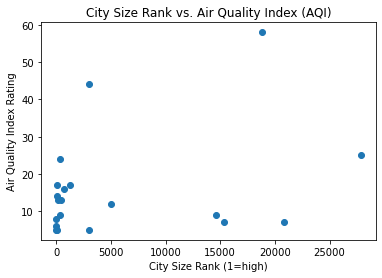

In [66]:
x=size_and_aqi['SizeRank']
y=size_and_aqi['AQI']
plt.scatter(x, y) 
plt.xlabel('City Size Rank (1=high)')
plt.ylabel('Air Quality Index Rating')
plt.title('City Size Rank vs. Air Quality Index (AQI)')

In [65]:
pearsonr=scipy.stats.pearsonr(x, y)
pearsonr

(0.3024464745344437, 0.1949416932175492)

In [9]:
non_airport_cities=[]
for key,value in state_dict.items():
    for city in value:
        if city not in airport_cities:
            non_airport_cities.append((city,key))
     
#1189 cities with stations, 1096 cities after deleting cities with airports       

NameError: name 'airport_cities' is not defined

In [8]:
# non_airport_cities
# len(non_airport_cities)

NameError: name 'non_airport_cities' is not defined

In [ ]:
non_airport_aqi=[]
non_airport_city=[]
non_airport_state=[]

for city, state in non_airport_cities:
       
    url=f'http://api.airvisual.com/v2/city?city={city}&state={state}&country=USA&key={aqi_key}'
    response=requests.get(url).json()
    non_airport_aqi.append(response['data']['current']['pollution']['aqius'])
    non_airport_city.append(city)
    non_airport_state.append(state)


In [ ]:
non_airport_df=pd.DataFrame({'City': non_airport_city, 'STATE':non_airport_state, 'AQI': non_airport_aqi})
non_airport_df

In [ ]:
aqi_list